In [3]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sb
from calendar import month_abbr as months
import math
import numpy as np

In [114]:
def monthyear_from_number(number, monthslist):
    year = 2018 + math.floor((number+2)/12)
    month = monthslist[ (number+2) % 12]
    return str(month)+" "+ str(year)

def year_from_monthyear(monthyear, month):
    actual_year = np.floor( (monthyear - (month-startMonth) )/12) + startYear 
    return actual_year

def month_from_monthyear(monthyear, year):
    actual_month = monthyear - 12*(year -startYear) + startMonth
    return actual_month

In [132]:
df = pd.read_csv("tickets_automated.csv", header=0)
df['SEK'] = df['SEK'].fillna(0)
df['datetime'] = pd.to_datetime(df['datetime'])
df.drop_duplicates("datetime", inplace=True)
startYear = min(df["Year"])
startMonth = 2
df.info()
print(df[-50:-1])

<class 'pandas.core.frame.DataFrame'>
Index: 820 entries, 0 to 1644
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             820 non-null    int64         
 1   datetime               820 non-null    datetime64[ns]
 2   SEK                    820 non-null    float64       
 3   Single tickets bought  820 non-null    int64         
 4   Day                    820 non-null    int64         
 5   Month                  820 non-null    int64         
 6   Year                   820 non-null    int64         
 7   weekday                820 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(6)
memory usage: 57.7 KB
      Unnamed: 0            datetime    SEK  Single tickets bought  Day  \
1546        1546 2018-09-24 09:25:42   27.0                      1   24   
1548        1548 2018-09-22 15:33:38   27.0                      1   22   
1550        155

In [133]:
df.set_index("datetime", inplace=True)
df.head()

,Unnamed: 0,SEK,Single tickets bought,Day,Month,Year,weekday
datetime,,,,,,,
2025-03-14 13:04:22,0,37.0,1,14,3,2025,4
2025-03-14 10:51:37,2,37.0,1,14,3,2025,4
2025-03-13 12:49:50,4,37.0,1,13,3,2025,3
2025-03-12 12:41:41,6,37.0,1,12,3,2025,2
2025-03-12 07:34:16,8,37.0,1,12,3,2025,2


In [134]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [135]:
df.head(len(df))

,SEK,Single tickets bought,Day,Month,Year,weekday
datetime,,,,,,
2025-03-14 13:04:22,37.0,1,14,3,2025,4
2025-03-14 10:51:37,37.0,1,14,3,2025,4
2025-03-13 12:49:50,37.0,1,13,3,2025,3
2025-03-12 12:41:41,37.0,1,12,3,2025,2
2025-03-12 07:34:16,37.0,1,12,3,2025,2
...,...,...,...,...,...,...
2018-03-22 23:57:38,27.0,1,22,3,2018,3
2018-03-22 21:25:40,27.0,1,22,3,2018,3
2018-03-20 15:15:48,27.0,1,20,3,2018,1


In [ ]:
df2 = df.groupby(["Year","Month"], as_index=False)['SEK'].aggregate(['sum'])
df2['Month-Year'] = (df2["Year"]-startYear)*12 + df2["Month"]-startMonth
df2 = df2.set_index(["Month-Year"])
#df2 = df2.drop(labels=["Year","Month"], axis=1)
df2= df2.reindex(list(range(df2.index.min(),df2.index.max()+1)),fill_value=0)
df2["Year"] = year_from_monthyear(df2.index, df2["Month"])
df2["Month"] = month_from_monthyear(df2.index, df2["Year"])
df2["Year"] = df2["Year"].astype("int32")
df2["Month"] = df2["Month"].astype("int32")

            Year  Month     sum
Month-Year                     
20          2019     10     0.0
21          2019     11  3392.0
22          2020      0     0.0
23          2020      1   360.0
24          2020      2   770.0
25          2020      3   320.0
26          2020      4     0.0
27          2020      5     0.0
28          2020      6   140.0
29          2020      7   495.0
30          2020      8    60.0
31          2020      9    90.0
32          2020     10   120.0
33          2020     11     0.0
34          2021      0     0.0
35          2021      1     0.0
36          2021      2     0.0
37          2021      3   204.0
38          2021      4   136.0
39          2021      5     0.0


/tmp/ipykernel_197023/249549933.py:3: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  ax = sb.barplot(data=df2, x=df2.index, y='sum', hue="Year", palette=sb.color_palette())


Text(0.5, 1.0, 'Monthly purchases of Västtrafik tickets in SEK')

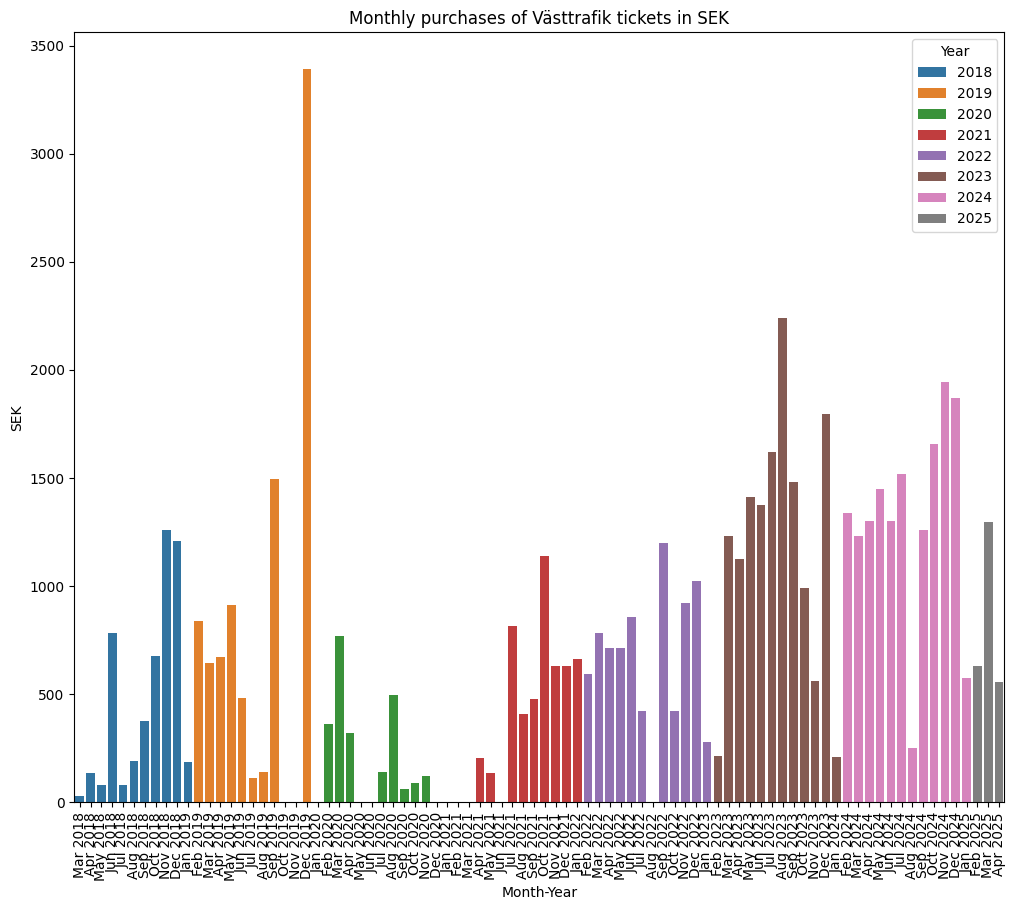

In [ ]:
months_list = list(months[1:])
plt.figure(figsize=(12,10))
ax = sb.barplot(data=df2, x=df2.index, y='sum', hue="Year", palette=sb.color_palette())
x_labels = [monthyear_from_number(x, months_list, startYear, startMonth) for x in df2.index ]
ax.set_ylabel("SEK")
ax.set_xticks(ax.get_xticks(), x_labels, rotation=90)
plt.title("Monthly purchases of Västtrafik tickets in SEK")

   Year      SEK
0  2018   4995.0
1  2019   8688.0
2  2020   2355.0
3  2021   5100.0
4  2022   7930.0
5  2023  14249.0
6  2024  15702.0
7  2025   2479.0


/tmp/ipykernel_197023/2466501099.py:4: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  ax2 = sb.barplot(data=df3, x='Year', y='SEK', hue="Year", palette=sb.color_palette())


Text(24.0, 0.5, 'SEK')

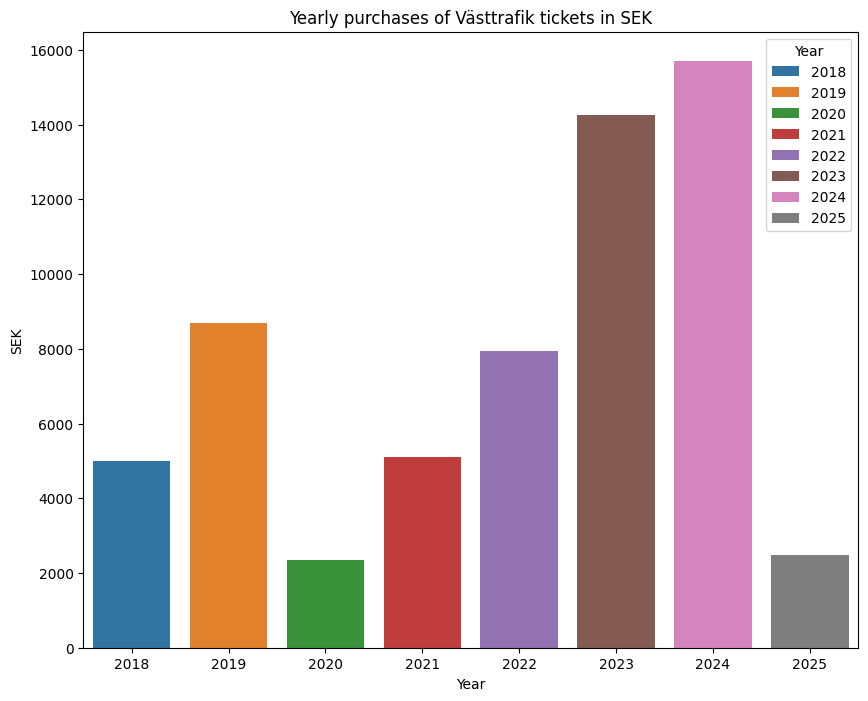

In [124]:
plt.figure(figsize=(10,8))
df3 = df.groupby(["Year"], as_index=False)['SEK'].aggregate('sum')
ax2 = sb.barplot(data=df3, x='Year', y='SEK', hue="Year", palette=sb.color_palette())
plt.title("Yearly purchases of Västtrafik tickets in SEK")
ax.set_ylabel("SEK")

/tmp/ipykernel_197023/525788458.py:7: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  ax3 = sb.barplot(data=df4, x=df4.index, y='Single tickets bought', hue="Year", palette=sb.color_palette())


Text(0.5, 1.0, 'Monthly purchases of single tickets')

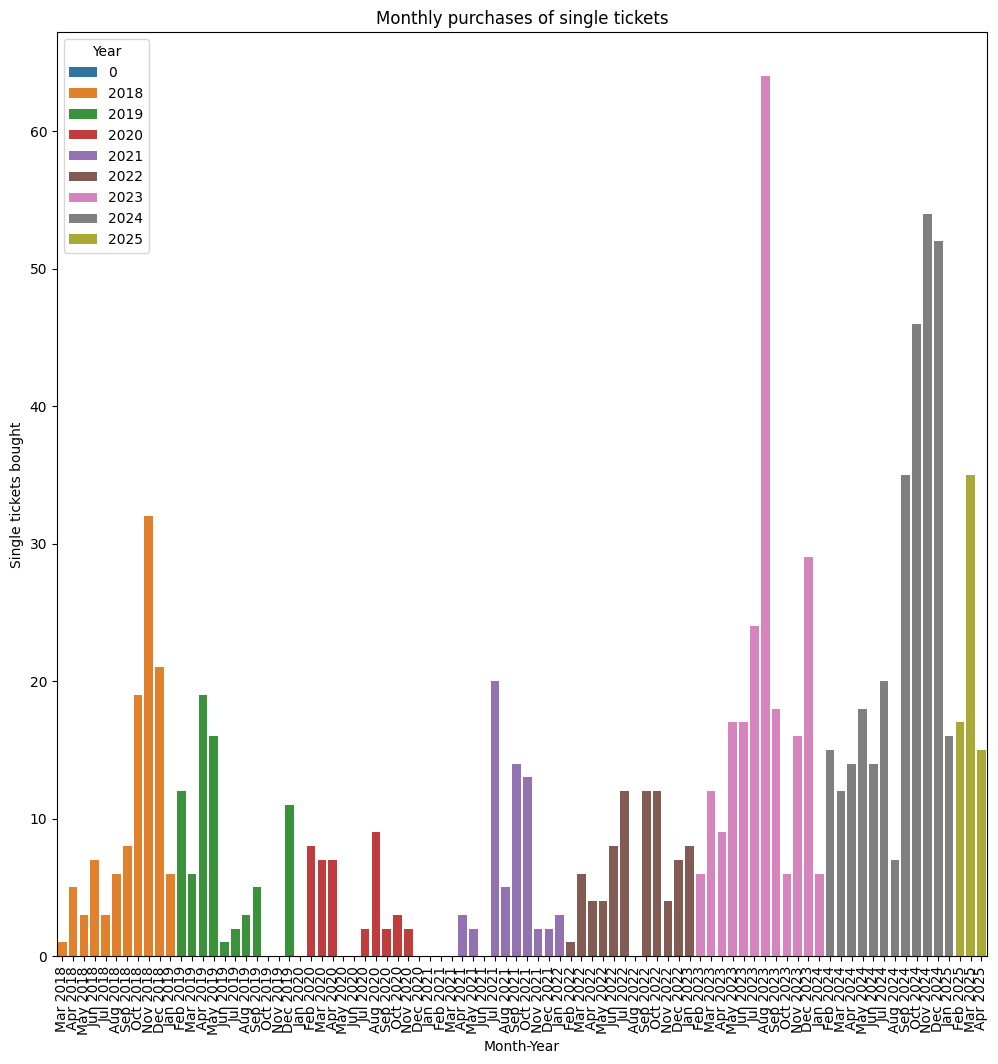

In [128]:
plt.figure(figsize=(12,12))
df4 = df.groupby(["Year", "Month"], as_index=False)['Single tickets bought'].aggregate('sum')
df4['Month-Year'] = (df4["Year"]-startYear)*12 + df4["Month"]-startMonth
df4 = df4.set_index(["Month-Year"])
#df2 = df2.drop(labels=["Year","Month"], axis=1)
df4= df4.reindex(list(range(df4.index.min(),df4.index.max()+1)),fill_value=0)
ax3 = sb.barplot(data=df4, x=df4.index, y='Single tickets bought', hue="Year", palette=sb.color_palette())
x_labels = [monthyear_from_number(x, months_list) for x in df4.index ]
ax3.set_xticks(ax3.get_xticks(), x_labels, rotation=90)
ax.set_ylabel("number")
plt.title("Monthly purchases of single tickets")

/tmp/ipykernel_83625/3720617357.py:4: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  ax4 = sb.barplot(data=df5, x='Month-Year', y='SEK', hue="Year", palette=sb.color_palette())


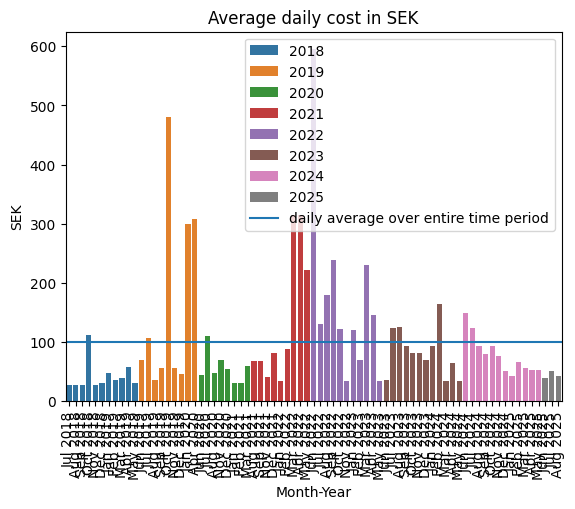

In [7]:
plt.figure()
df5 = df.groupby(["Year", "Month"], as_index=False)['SEK'].aggregate('mean')
df5['Month-Year'] = (df5["Year"]-startYear)*12 + df5["Month"]-startMonth
ax4 = sb.barplot(data=df5, x='Month-Year', y='SEK', hue="Year", palette=sb.color_palette())
x_labels = [monthyear_from_number(x, months_list) for x in df5['Month-Year'] ]
ax4.set_xticks(ax4.get_xticks(), x_labels, rotation=90)
plt.title("Average daily cost in SEK")
plt.axhline(y=df5.aggregate('mean')['SEK'], label="daily average over entire time period")
#print(df5)
plt.legend()

/tmp/ipykernel_197023/2577199098.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(np.round(100*ax.get_yticks(),2))


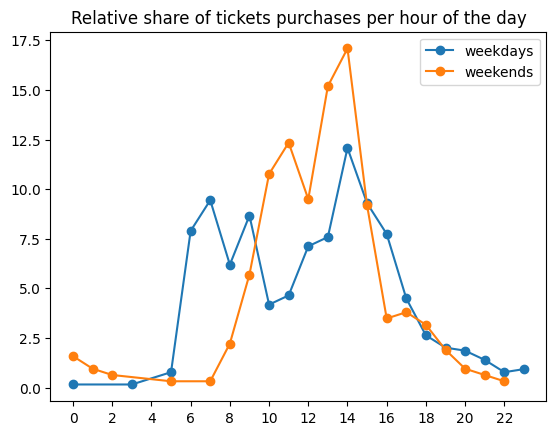

In [ ]:
df["hour"] = df.index.hour
fig= plt.figure()
ax = plt.subplot(1,1,1)
df_hourly_weekday = df[( df["weekday"] < 5)  ].groupby(["hour"])["Single tickets bought"].sum()/df[( df["weekday"] < 5)  ]["Single tickets bought"].sum()
df_hourly_weekend = df[( df["weekday"] >= 5) ].groupby(["hour"])["Single tickets bought"].sum()/df[( df["weekday"] >= 5)  ]["Single tickets bought"].sum()
plt.plot(df_hourly_weekday.index, df_hourly_weekday.values, marker="o", label="weekdays")
plt.plot(df_hourly_weekend.index, df_hourly_weekend.values, marker="o", label="weekends")
plt.xticks(range(0,24, 2));
plt.title("Relative share of tickets purchases per hour of the day")
ax.set_yticklabels(np.round(100*ax.get_yticks(),2))
plt.legend()

646